# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object

html = browser.html
soup = BeautifulSoup(html)
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [9]:
# Extract all rows of data

table_elements = soup.select("table.table > tbody tr.data-row")
print(len(table_elements))
table_elements

1867


[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row_element in table_elements:
    row_data = []
    for td in row_element.select("td"):
        row_data.append(td.text)
    data.append(row_data)

# this value should be the same as the number from extracting all the rows
print(len(data))




1867


In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

weather_df = pd.DataFrame(data, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])


In [13]:
# Confirm DataFrame was created successfully
weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [16]:
# Change data types for data analysis
weather_df2 = weather_df.astype({"id": "object",
                "terrestrial_date": "datetime64[ns]",
                "sol": int,
                "ls": int,
                "month": int,
                "min_temp": float,
                "pressure": float})
#

In [17]:
# Confirm type changes were successful by examining data types again
weather_df2.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [19]:
# 1. How many months are there on Mars?
weather_df["month"].value_counts().sort_index()

month
1     174
10    112
11    138
12    166
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
Name: count, dtype: int64

In [20]:
# 2. How many sols (Martian days) worth of data are there?
len(weather_df["sol"].unique())

1867

In [36]:
# 3. What is the average minimum temperature by month?
# Convert 'min_temp' to numeric, coercing any invalid values to NaN
weather_df['min_temp'] = pd.to_numeric(weather_df['min_temp'], errors='coerce')

# Now group by 'month' and calculate the mean of 'min_temp'
average_min_temp = weather_df.groupby("month").agg({"min_temp": "mean"})
average_min_temp

,min_temp
month,
1,-77.160920
10,-71.982143
11,-71.985507
12,-74.451807
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320


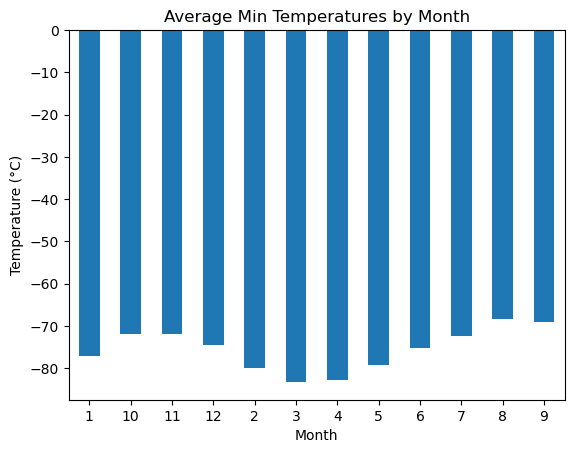

In [37]:
# Plot the average minimum temperature by month
average_min_temp.plot.bar(title="Average Min Temperatures by Month",
                                   xlabel="Month", ylabel="Temperature (°C)",
                                   legend=False, rot=0)

plt.savefig("Images/average_min_temp.png")
plt.show()

In [38]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
average_min_temp = average_min_temp.sort_values("min_temp")
average_min_temp

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


In [39]:
# Identify the coldest and hottest months
coldest_month = average_min_temp.iloc[0]  # First entry after sorting
hottest_month = average_min_temp.iloc[-1]  # Last entry after sorting

# Print out the results
print(f"Coldest Month: {coldest_month.name} with Temperature: {coldest_month['min_temp']}°C")
print(f"Hottest Month: {hottest_month.name} with Temperature: {hottest_month['min_temp']}°C")

Coldest Month: 3 with Temperature: -83.30729166666667°C
Hottest Month: 8 with Temperature: -68.38297872340425°C


In [49]:
# 4. What is the average pressure by month?
# Convert 'min_temp' to numeric, coercing any invalid values to NaN
weather_df['pressure'] = pd.to_numeric(weather_df['pressure'], errors='coerce')

average_pressure = weather_df.groupby("month").agg({"pressure": "mean"})  # Fixed the string syntax
average_pressure

,pressure
month,
1,862.488506
10,887.312500
11,857.014493
12,842.156627
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422


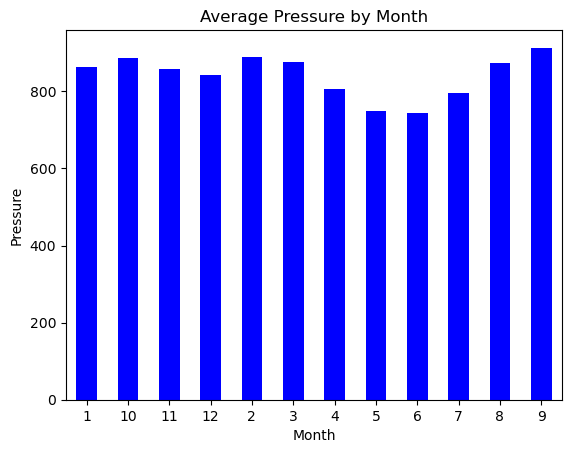

In [50]:
# Plot the average pressure by month
average_pressure.plot.bar(title="Average Pressure by Month",
                                   xlabel="Month", ylabel="Pressure",
                                   legend=False, rot=0, color="blue")

plt.savefig("Images/average_pressure.png")
plt.show()

In [51]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
average_pressure = average_pressure.sort_values("pressure")
average_pressure

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


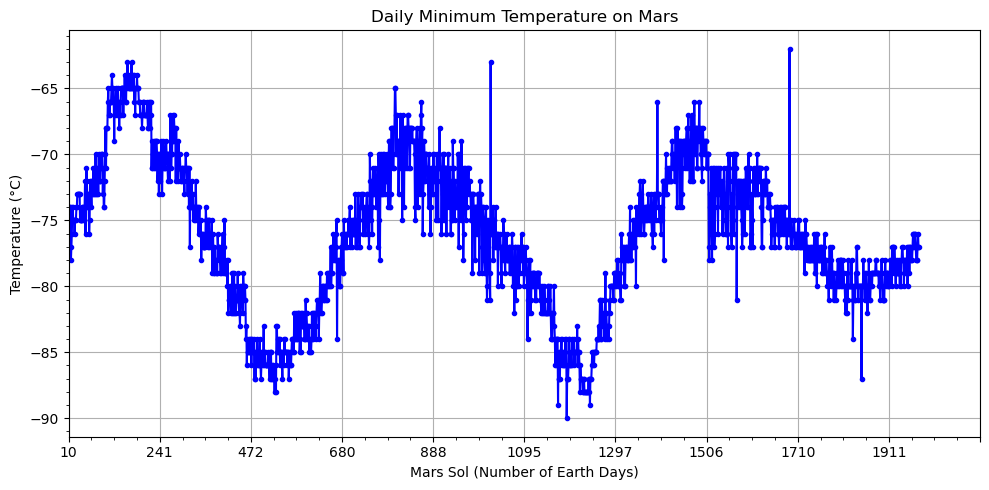

In [66]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
from matplotlib.ticker import MaxNLocator

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(weather_df["sol"], weather_df["min_temp"], color="blue", marker='o', markersize=3, linestyle='-')

# Title and labels
plt.title("Daily Minimum Temperature on Mars")
plt.xlabel("Mars Sol (Number of Earth Days)")
plt.ylabel("Temperature (°C)")

# Limit x-axis and add grid
plt.grid(True, axis='both')
plt.xlim(0, 2000)

# Use MaxNLocator to limit the number of ticks on the x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))  # Adjust the number of bins as needed

# Add minor ticks
plt.minorticks_on()

# Ensure layout is tight and save the figure
plt.tight_layout()
plt.savefig("Images/min_temp.png")

# Display the plot
plt.show()

#### Minimum Temperature

Observation: The graph displays the daily minimum temperatures recorded on Mars over a span of roughly 2000 Martian sols (Mars days). The temperature fluctuates between around -65°C and -90°C.

There are clear cyclical patterns, likely indicating seasonal temperature changes on Mars.

Analysis: The cyclic temperature patterns suggest that Mars experiences significant seasonal variations, where the temperatures drop to very low values (close to -90°C) during colder periods and rise slightly during warmer periods (close to -65°C). The data also suggests the presence of both longer-term trends and smaller-scale daily variations.

#### Atmospheric Pressure

Observation: The bar graph shows the average atmospheric pressure by month on Mars, measured in Pascals.
The highest pressure is recorded in months 3 and 9, while months 4 and 5 show significantly lower pressures.

Analysis: The variation in pressure could be due to seasonal atmospheric effects on Mars. Higher pressure in months 3 and 9 might indicate the buildup of atmospheric gases during certain periods, possibly related to the sublimation and condensation of CO₂ in Mars' polar ice caps. The pressure changes could also be influenced by Martian weather patterns and solar heating during different seasons.

#### Year Length

From the graph, it appears that one full cycle of temperature change corresponds to roughly 668 sols (Mars days). Since 1 sol ≈ 1.027 Earth days, a Martian year would be approximately 668 sols × 1.027 ≈ 686.9 Earth days, which is close to the known value of a Martian year being about 687 Earth days.

# Average Minimum Temperature by Month Analysis
Observation: This graph shows the average minimum temperature for each month on Mars. The temperatures are consistently cold, ranging between approximately -60°C and -80°C.

Analysis: The coldest months appear to be around months 4 and 5, possibly corresponding to winter in the Martian southern hemisphere. The warmer months are around 1 and 10, which could indicate a shift towards Martian summer. This analysis suggests that Mars experiences significant seasonal temperature variations, with winter months being considerably colder.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [69]:
# Write the data to a CSV
weather_df.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")


In [58]:
browser.quit()